## Done By: Me (AGBONGHAE OGHOGHO JOSHUA) to Lecture some Student Internship under me from SRI SRI UNIVERSITY INDIA.

As a result of their physics informed Neuron Networks (PINNs) Project.

## ANNs (or MLPs – Multi-Layer Perceptrons) are designed to learn function mappings from these inputs to outputs andare perfect for PINNs

## The Tangent Galvanometer experiment involves scalar input-output relationships like:
Inputs: Current (I), Number of turns (N), Radius (R), Deflection angle (θ)
Output: Horizontal magnetic field 
𝐵H

In [5]:
## Numerical and Scientific Computing:
# For numerical operations
import numpy as np 
# Useful for organizing and preprocessing your experimental data. Can convert data_50_turns and data_500_turns into DataFrames
import pandas as pd
# Physical constant: vacuum permeability
from scipy.constants import mu_0       #mu_0 = 4π × 10⁻⁷ H/m → You’ll use this in your Tangent Law equation.
# Basic plotting
import matplotlib.pyplot as plt
# Better-looking statistical plots
import seaborn as sns
import tensorflow as tf

tf.config.run_functions_eagerly(True)  # enables eager mode, even with tf.function
from tensorflow.keras import layers, models, optimizers    # Define the neural network architecture (ANN/MLP)
                                                           # Train the model
                                                           #Use automatic differentiation for your physics-informed loss function
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
# importing the evaluation matric libraries to determine the error losses

In [6]:
print("TF Version:", tf.__version__)
print("Eager Execution:", tf.executing_eagerly())

TF Version: 2.18.0
Eager Execution: True


In [8]:
# only run this once
!pip install deepxde==1.9.1 tensorflow==2.13.0 --quiet
#import deepxde as dde
import warnings
warnings.filterwarnings("ignore")

ERROR: Could not find a version that satisfies the requirement tensorflow==2.13.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.13.0


In [23]:
print("TF Version:", tf.__version__)
print("Eager Execution:", tf.executing_eagerly())

TF Version: 2.18.0
Eager Execution: True


In [24]:
# Enable eager mode because of deepxde library above has already shut tf down

In [25]:
# For complex equation
import sympy as sp

In [26]:
# Constants
# To calculate magnetic field BH
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (T·m/A) also known as the magnetic constant variable mu_0.
#in Ampère's Law and the Biot–Savart Law.

In [27]:
# Create the datasets
# 5 column, 10 rows:
data_50_turns = np.array([
    [30, 19, 19, 20, 20],
    [40, 24, 24, 25, 25],
    [54, 31, 31, 32, 32],
    [62, 35, 35, 36, 36],
    [76, 40, 40, 41, 41],
    [85, 43, 43, 45, 45],
    [113, 50, 50, 53, 53],
    [137, 55, 55, 58, 58],
    [167, 60, 60, 64, 64],
    [226, 66, 66, 70, 70]
])
data_500_turns = np.array([
    [3, 18, 18, 18, 18],
    [4.2, 24, 24, 24, 24],
    [5.6, 30, 30, 30, 30],
    [6.9, 36, 36, 36, 36],
    [8.8, 42, 42, 43, 43],
    [10.4, 47, 47, 49, 49],
    [13.1, 53, 53, 55, 55],
    [16, 58, 58, 60, 60],
    [19.3, 62, 62, 65, 65],
    [25.4, 67, 67, 71, 71]
])

## Creates a Pandas DataFrame with 4 columns:
"I" = current values

"theta_deg" = average measured angles in degrees

"N" = number of turns (either constant or an array)

"R" = coil radius (either constant or an array)

"theta_rad": theta_rad   (The angle in radians)

 "BH_physics": BH_physics  (The theoretical magnetic field (BH))

In [28]:
# Processing function

# data A 2D NumPy array (from experiment measurements),
# turns: the number of coil turns (a scalar or array),
# radius: the coil radius (a scalar or array)
# Extracts the first column of the data array, assumed to be electric current values (I). 
# data[:, 0] means: all rows, column 0.
def process_data(data, turns, radius):
    currents = data[:, 0]
    theta_deg = np.mean(data[:, 1:], axis=1)
    theta_rad = np.radians(theta_deg)
    BH_physics = (mu_0 * turns * currents) / (2 * radius * np.tan(theta_rad))
    return pd.DataFrame({
        "I": currents,
        "theta_deg": theta_deg,
        "N": turns,
        "R": radius,
        "theta_rad": theta_rad,
        "BH_physics": BH_physics,
    })

In [29]:
process_data

<function __main__.process_data(data, turns, radius)>

In [30]:
# Process both datasets
df_50 = process_data(data_50_turns, 50, 0.15)
df_500 = process_data(data_500_turns, 500, 0.15)

In [31]:
# Combine datasets
df_all = pd.concat([df_50, df_500], ignore_index=True)

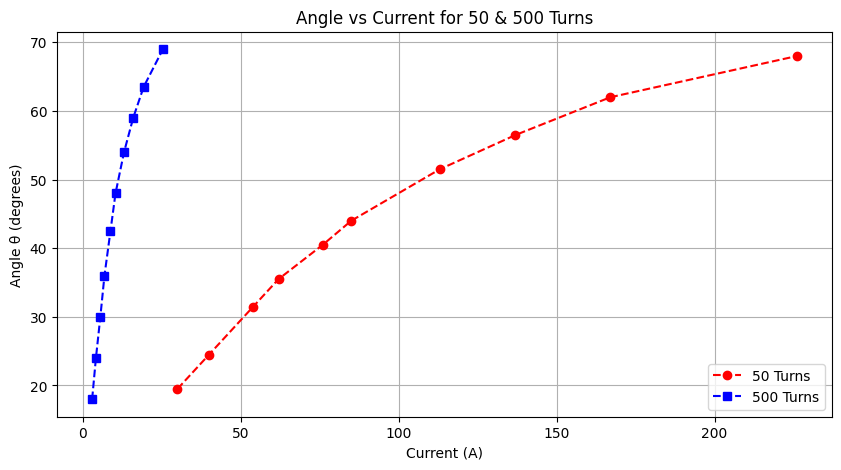

In [32]:
# Visualization: Raw Angles vs Current
plt.figure(figsize=(10, 5))
plt.plot(df_50["I"], df_50["theta_deg"], label="50 Turns", marker='o', linestyle='--', color='red')
plt.plot(df_500["I"], df_500["theta_deg"], label="500 Turns", marker='s', linestyle='--', color='blue')
plt.xlabel("Current (A)")
plt.ylabel("Angle θ (degrees)")
plt.title("Angle vs Current for 50 & 500 Turns")
plt.grid(True)
plt.legend()
plt.show()

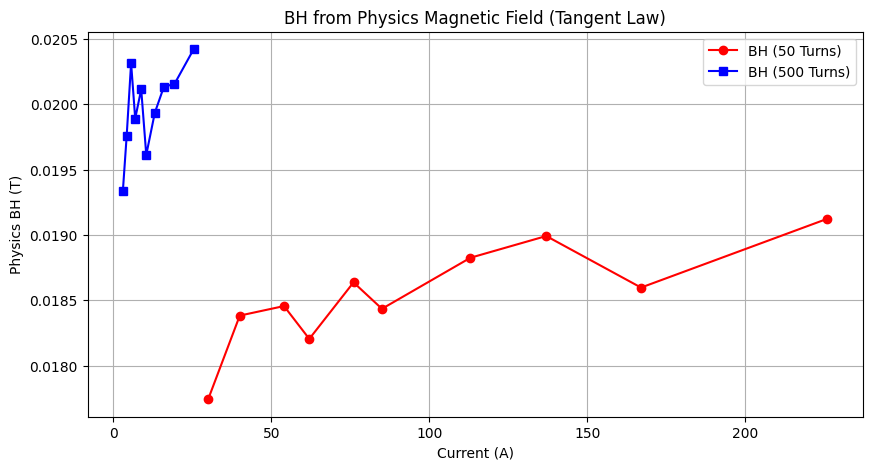

In [33]:
# Visualization: Physics-Based BH
plt.figure(figsize=(10, 5))
plt.plot(df_50["I"], df_50["BH_physics"], label="BH (50 Turns)", marker='o', color='red')
plt.plot(df_500["I"], df_500["BH_physics"], label="BH (500 Turns)", marker='s', color='blue')
plt.xlabel("Current (A)")
plt.ylabel("Physics BH (T)")
plt.title("BH from Physics Magnetic Field (Tangent Law)")
plt.legend()
plt.grid(True)
plt.show()

## The value 0.15 comes from this formular:

##BH_physics = (μ₀ * N * I) / (2 * R * tan(θ))
Here, R = 0.15 refers to the radius of the circular coil (in meters) used in the tangent galvanometer setup.

θ = deflection angle

In Physics-Informed Neural Network (PINN) model, we use the Tangent Law and Ampere’s Law to estimate the Earth's magnetic field.
This equation is derived from the magnetic field at the center of a circular coil:

B = μ0NI/2R

Where:
μ0=4π×10−7 T·m/A (magnetic constant)

N = number of turns in the coil

I = current through the coil (in Amps)

R = radius of the coil in meters 

BH = Magnetic Field

theta_rad = theta_rad (The angle in radians)

theta_deg = average measured angles in degrees


# 0.15 implies that the physical radius (R) of the coil used in the experiment was
# 15 cm, or 0.15 meters 


In [34]:
df_all.head(15)

,I,theta_deg,N,R,theta_rad,BH_physics
0,30.0,19.5,50,0.15,0.340339,0.017743
1,40.0,24.5,50,0.15,0.427606,0.018383
2,54.0,31.5,50,0.15,0.549779,0.018456
3,62.0,35.5,50,0.15,0.619592,0.018205
4,76.0,40.5,50,0.15,0.706858,0.018637
5,85.0,44.0,50,0.15,0.767945,0.018435
6,113.0,51.5,50,0.15,0.898845,0.018825
7,137.0,56.5,50,0.15,0.986111,0.018992
8,167.0,62.0,50,0.15,1.082104,0.018597
9,226.0,68.0,50,0.15,1.186824,0.019124


In [35]:
df_all.tail()

,I,theta_deg,N,R,theta_rad,BH_physics
15,10.4,48.0,500,0.15,0.837758,0.019612
16,13.1,54.0,500,0.15,0.942478,0.019934
17,16.0,59.0,500,0.15,1.029744,0.020135
18,19.3,63.5,500,0.15,1.108284,0.020154
19,25.4,69.0,500,0.15,1.204277,0.020421


In [36]:
# Features and target
X = df_all[["I", "N", "R", "theta_rad"]].values
y = df_all["BH_physics"].values

## Converts radius of the coil from centimeters to meters.

...This ensures consistent SI units for physical calculations (1 meter = 100 cm).

...df_all["BH"] = (mu_0 * df_all["N"] * df_all["I"]) / (2 * df_all["R"] * np.tan(df_all["theta_rad"]))
           This formula comes from the Tangent Law:
We're computing the Earth’s horizontal magnetic field component BH for each row of data.
... 

In [114]:
# Normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Physics-Informed Neural Network (PINN)

In [115]:
# Build model
model = models.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [116]:
# Train model
history = model.fit(X_scaled, y, epochs=100, verbose=0)

In [117]:
# Predictions
y_pred = model.predict(X_scaled).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [118]:
# Evaluation of the Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

## Physics-informed loss

In [120]:
print("\n--- Final Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.6e}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6e}")
print(f"R² Score: {r2:.4f}")
print(f"Predicted BH: {predicted_bh:.6e} T")


--- Final Evaluation ---
Mean Squared Error (MSE): 3.711936e-06
Root Mean Squared Error (RMSE): 1.926639e-03
R² Score: -4.8927
Predicted BH: 2.140992e-02 T


## Plotting Training Loss per Epoch

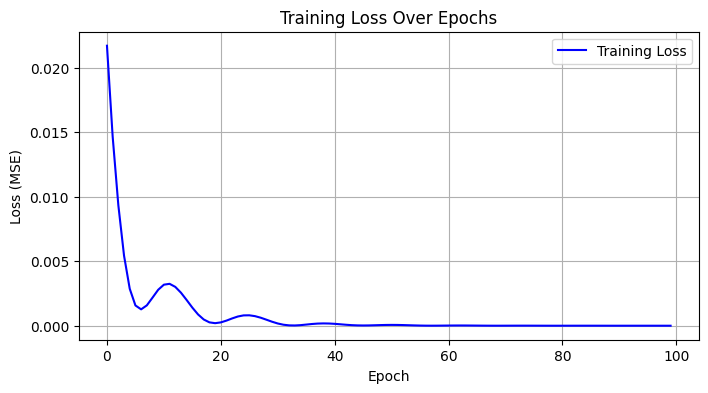

In [121]:
# Extract loss values
loss_values = history.history['loss']

# Plot
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Training Loss', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.legend()
plt.show()

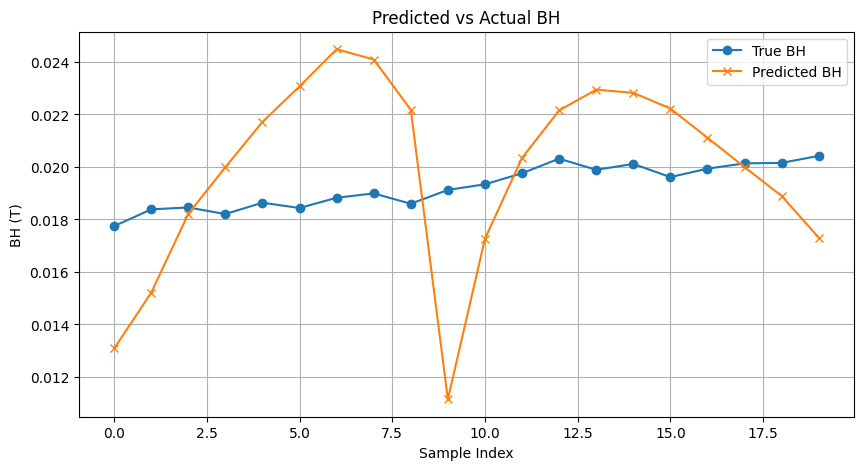

In [105]:
# Visualization: Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(y, label="True BH", marker='o')
plt.plot(y_pred, label="Predicted BH", marker='x')
plt.title("Predicted vs Actual BH")
plt.xlabel("Sample Index")
plt.ylabel("BH (T)")
plt.grid(True)
plt.legend()
plt.show()

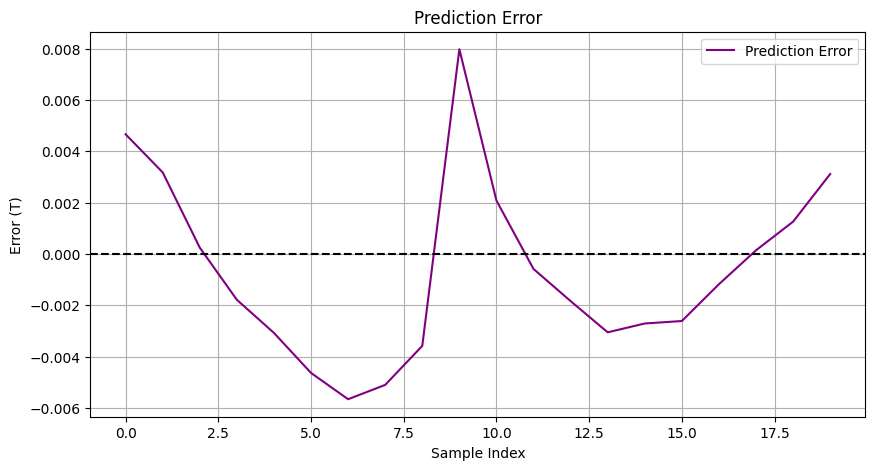

In [106]:
# Visualization: Prediction Error
plt.figure(figsize=(10, 5))
plt.plot(y - y_pred, label="Prediction Error", color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Error")
plt.xlabel("Sample Index")
plt.ylabel("Error (T)")
plt.grid(True)
plt.legend()
plt.show()

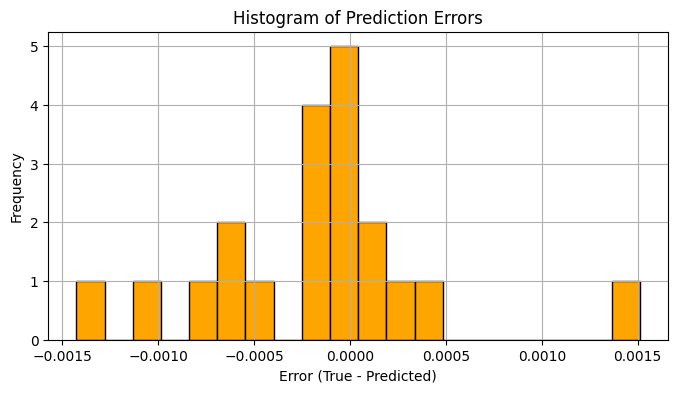

In [107]:
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title("Histogram of Prediction Errors")
plt.xlabel("Error (True - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

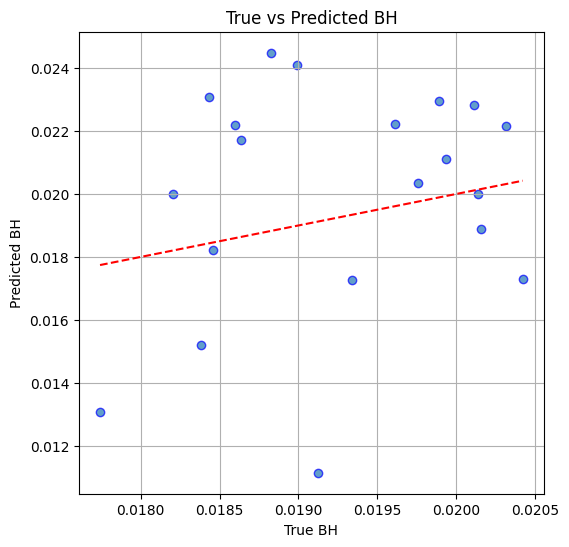

In [108]:
# perfect prediction line
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.7, edgecolors='b')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')  
plt.title("True vs Predicted BH")
plt.xlabel("True BH")
plt.ylabel("Predicted BH")
plt.grid(True)
plt.show()

## # Save your trained model to a .keras file

In [109]:
# Save your trained model to a .keras file
model.save("joshua_BH_model.keras")
print("Model saved successfully.")

Model saved successfully.


## Load the saved Model

In [110]:
from tensorflow.keras.models import load_model

model = load_model("joshua_BH_model.keras")
print("Model loaded successfully.")

Model loaded successfully.


## Making Predictions on Same Sample

In [111]:
# Use the same scaler to transform new inputs
X_scaled_new = scaler.transform(X)

# Predict using loaded model
y_pred_new = model.predict(X_scaled_new).flatten()

# Show predictions
print("Predicted BH values:\n", y_pred_new)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted BH values:
 [0.01308427 0.01520824 0.01821194 0.01999017 0.02171276 0.02306908
 0.0244831  0.02409115 0.02217735 0.01115104 0.01725799 0.02034281
 0.02215075 0.02294279 0.02282217 0.02222423 0.02111278 0.0199929
 0.01889652 0.01730916]


## Making Predictions on New Sample

In [112]:
# New data: [Current, Turns, Radius, Theta in radians]
new_input = np.array([[100, 50, 0.15, np.radians(45)]])  # sample input

# Scale using previously fit scaler
new_input_scaled = scaler.transform(new_input)

# Predict
predicted_bh = model.predict(new_input_scaled).flatten()[0]
print(f"Predicted BH: {predicted_bh:.6e} T")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted BH: 2.140992e-02 T
